In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [30]:
date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
last_12_mos_prcp = session.query(measurement.prcp).filter(measurement.date > date).all()
last_12_mos_prcp

last_12_mos_prcp1 = list(np.ravel(last_12_mos_prcp))
last_12_mos_prcp1

[0.08,
 0.08,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.13,
 0.0,
 0.0,
 0.0,
 0.03,
 None,
 None,
 0.05,
 0.0,
 0.03,
 0.0,
 0.05,
 0.0,
 0.02,
 1.32,
 0.42,
 0.06,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.06,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.05,
 0.15,
 0.01,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.24,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.05,
 0.01,
 0.13,
 0.14,
 0.05,
 0.05,
 0.05,
 0.0,
 0.01,
 0.0,
 0.14,
 0.12,
 0.03,
 0.0,
 0.03,
 0.43,
 0.02,
 0.0,
 0.03,
 0.52,
 0.05,
 0.04,
 0.01,
 0.05,
 0.03,
 0.0,
 0.0,
 0.01,
 0.13,
 0.01,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.0,
 0.02,
 0.0,
 0.02,
 0.04,
 0.12,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16,
 0.0,
 0.04,
 0.03,
 0.0,
 0

In [14]:
last_12_mos = session.query(measurement.date).filter(measurement.date>date).all()
last_12_mos

last_12_mos1 = list(np.ravel(last_12_mos))
last_12_mos1

['2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-05',
 '2016-09-06',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-10',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-17',
 '2016-09-18',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-24',
 '2016-09-25',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-01',
 '2016-10-02',
 '2016-10-03',
 '2016-10-04',
 '2016-10-05',
 '2016-10-06',
 '2016-10-07',
 '2016-10-08',
 '2016-10-09',
 '2016-10-10',
 '2016-10-11',
 '2016-10-12',
 '2016-10-13',
 '2016-10-14',
 '2016-10-15',
 '2016-10-16',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-20',
 '2016-10-21',
 '2016-10-22',
 '2016-10-23',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26',
 '2016-10-27',
 '2016-10-28',
 '2016-10-

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# I made two of the same dataframe to fiddle around, but only referred back to one in the end
df1 = pd.DataFrame(last_12_mos_prcp1, last_12_mos1, columns=['precipitation'])
df1

,precipitation
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56
2017-08-22,0.50


In [16]:
df = pd.DataFrame({"Date":last_12_mos1,"Precipitation":last_12_mos_prcp1})
df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [17]:
# Sort the dataframe by date
by_date = df.set_index('Date').sort_index()
by_date

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


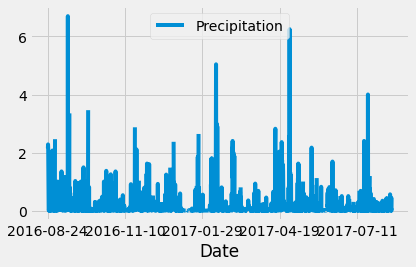

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
by_date.plot()
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = df1.describe()
summary_stats

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement.station).all()
stations

session.query(measurement.station).distinct(measurement.station).group_by(measurement.station).count()

# stations1 = list(np.ravel(stations))
# df2 = pd.DataFrame({"Stations":stations1})
# unique_stations = pd.unique(stations1)
# unique_stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations = session.query(measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
# most_active_stations

most_active_stations_counts = session.query(func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations_counts

most_active_stations1 = list(np.ravel(most_active_stations))
most_active_stations1

most_active_stations_counts1 = list(np.ravel(most_active_stations_counts))
most_active_stations_counts1

most_active_stations_table = pd.DataFrame({"Station":most_active_stations1,"Count":most_active_stations_counts1})
most_active_stations_table


,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(measurement.tobs).filter_by(station='USC00519281').order_by((measurement.tobs).asc()).limit(1).all()
highest_temp = session.query(measurement.tobs).filter_by(station='USC00519281').order_by((measurement.tobs).desc()).limit(1).all()
average_temp = session.query(func.avg(measurement.tobs)).filter_by(station='USC00519281').all()

active_station_summary = print(lowest_temp,highest_temp,average_temp)
                               
# active_station_summary1 = list(np.ravel(active_station_summary))
# active_station_summary1

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_mos_temp = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date >= date).all()
last_12_mos_temp

last_12_mos_temp1 = list(np.ravel(last_12_mos_temp))
last_12_mos_temp2 = pd.DataFrame({"Temperature":last_12_mos_temp1})
last_12_mos_temp2

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


<AxesSubplot:ylabel='Frequency'>

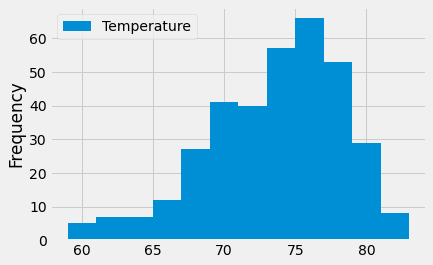

In [24]:
last_12_mos_temp2.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
